## Домашнее задание «Проблема качества данных»

### Задание

<b>Цель:</b><br> применить на практике методы по оценке качества данных. <p>
<b>Описание задания:</b><br>
В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. <br>
Данные можно скачать по <a href="https://www.kaggle.com/hesh97/titanicdataset-traincsv" target="_blank">ссылке</a> или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым <br>
признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. <br>
Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты.<br>
Значение метрики должно улучшиться.<p>

<b>Этапы работы:</b>
1. Получите и загрузите данные.
2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.
3. Снова загрузите полные данные.
4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.
5. Проверьте данные на наличие пропущенных значений.<br>
a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.<br>
b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.<br>
6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
7. Проверьте данные на наличие выбросов.<b4>
a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.
8. *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
9. *Попробуйте математически преобразовать признак Age.
10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.
11. Сформулируйте выводы по проделанной работе.<br>
a) Кратко опишите какие преобразования были сделаны и почему.<br>
b) Сравните метрики моделей из п. 2 и п. 10. <br>
c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные? <br>
Для получения зачета по этому домашнему заданию, минимально, должно быть построено две модели, выведена одна метрика для каждой. В данных должны быть обработаны пропуски и категориальные значения.



<b>Результат:</b>
применены на практике основные методы разведочного анализа данных (exploratory data analysis, EDA). Проведена оценка качества данных.
<p>

<b>Форма выполнения:</b>
- ссылка на Jupyter Notebook, загруженный на GitHub;
- ссылка на Google Colab;
- файл с расширением .ipynb.<p>

   
<b>Инструменты:</b>
- Jupyter Notebook/Google Colab;
- GitHub;
- файл athletes.csv<p>

<b>Срок выполнения:</b> дедлайн приема решений на проверку
    
<b><i>Рекомендации к выполнению: </b></i><br>
- Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
- У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
- Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
- Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv', )
data.head()
print(data.shape)

(891, 12)


> Описание DF:
> - Survived - выживаемость (0 - умер, 1 - выжил)
> - Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);
> - Name — имя;
> - Sex — пол;
> - Age — возраст;
> - SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;
> - Parch — количество родителей, детей (в том числе приемных) на борту титаника;
> - Ticket — номер билета;
> - Fare — плата за проезд;
> - Cabin — каюта;
> - Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

In [3]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# data.isnull().sum()

> По заданию удаляем все пропущенные значения и категориальные переменные

In [6]:
# удаляем пропущенные значения и столбцы которые являются категориальными переменными, а так же, так как в задании мы 
# не можем сделать категории, то удаляем все не цифровые столбцы, что бы модель могла обучиться

test1 = data.dropna().copy()
test1 = test1.drop(['Sex', 'Embarked', 'Pclass', 'Name', 'Ticket', 'Cabin'], axis=1) 

In [7]:
test1

,PassengerId,Survived,Age,SibSp,Parch,Fare
1,2,1,38.0,1,0,71.2833
3,4,1,35.0,1,0,53.1000
6,7,0,54.0,0,0,51.8625
10,11,1,4.0,1,1,16.7000
11,12,1,58.0,0,0,26.5500
...,...,...,...,...,...,...
871,872,1,47.0,1,1,52.5542
872,873,0,33.0,0,0,5.0000
879,880,1,56.0,0,1,83.1583
887,888,1,19.0,0,0,30.0000


> Строим модель

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler


In [9]:
selectedColumns = list(filter(lambda i: i != 'Survived', test1.columns))
X = test1[selectedColumns]
X.head()

,PassengerId,Age,SibSp,Parch,Fare
1,2,38.0,1,0,71.2833
3,4,35.0,1,0,53.1000
6,7,54.0,0,0,51.8625
10,11,4.0,1,1,16.7000
11,12,58.0,0,0,26.5500


In [10]:
y = test1['Survived']
y.head()

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

In [11]:
# Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
model_1 = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=3000)
)

In [13]:
model_1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=3000))])

In [14]:
model_1.score(X_test, y_test)

0.6727272727272727

___

> Создаем новый DF для анализа и для тестирования новой модели, созданной на базе нового DF

In [15]:
titanic = data.copy()

> Удаляем признаки, которые логически не нужны для построения модели.

*Объяснение:*<br> Для обучения и построения модели нам не нужно ID, имя пассажира, а так же номер его билета. <br>
Имя не несет смысловой нагрузки, билет так же не дает нам информации (если только мы не будем рассмтривать нумерологию и искать счастливые билеты).

In [16]:
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1) 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [17]:
# Визуально проверим все уникальные данные по всем колонкам c типом object:
for col in titanic.select_dtypes('object'):
    print(f'{col}: {titanic[col].unique()} \n')  

Sex: ['male' 'female'] 

Cabin: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148'] 

Embarked:

> Какой процент данных будет потерян, если просто удалить пропуски.

In [18]:
data_test = data.copy()
# удаляем строки с пропусками
data_test = data_test[~(data_test['Age'].isna())]
data_test = data_test[~(data_test['Cabin'].isna())]
data_test = data_test[~(data_test['Embarked'].isna())]

print(f" После удаления строк со всеми пропусками, мы потеряли: {100 - data_test['PassengerId'].count()*100 / data['PassengerId'].count():.2f}% данных")

 После удаления строк со всеми пропусками, мы потеряли: 79.46% данных


> Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

> 1. определим сколько уникальных значений есть 

In [19]:
# определение уникальных значений и их количество в столбце Embarked (порт посадки)
titanic['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

> * Из выше полученных данных, видно, что пропущенных значений всего 2, при этом наибольшее кол-во пассажиров сели в портe посадки S — Саутгемптон.<br>
Так как вероятность того, что пассажиры сели в S больше, то заменим проупски на этот пункт

In [20]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace = True)

In [21]:
# Сделаем столбцы с 0 и 1 для этих портов (удалим первый, так как если в обоих столбцах 0, то значит это первый порт

embarked = pd.get_dummies(titanic['Embarked'], prefix="Emb", drop_first = True)
titanic = pd.concat([titanic, embarked], axis = 1)

> * Закодируем категориальные переменные Sex (пол) числовыми значениями

In [22]:
from sklearn.preprocessing import LabelEncoder

lei = LabelEncoder()
lei.fit(titanic['Sex'])
titanic['Sex']=lei.transform(titanic['Sex'])
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Emb_Q,Emb_S
0,0,3,1,22.0,1,0,7.2500,NaN,S,0,1
1,1,1,0,38.0,1,0,71.2833,C85,C,0,0
2,1,3,0,26.0,0,0,7.9250,NaN,S,0,1
3,1,1,0,35.0,1,0,53.1000,C123,S,0,1
4,0,3,1,35.0,0,0,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,NaN,S,0,1
887,1,1,0,19.0,0,0,30.0000,B42,S,0,1
888,0,3,0,NaN,1,2,23.4500,NaN,S,0,1
889,1,1,1,26.0,0,0,30.0000,C148,C,0,0


> * По полученным ранее данным видно что меньше всего данных по каютам, я решил сделать новую колонку и при наличии каюты будет ставится этаж (палуба) каюты или 0 <br>


In [23]:
# Создадим новую колонку каюты по этажам, так как мы знаем, что в названии каюты закодирован этаж
titanic["Cabin_floor"] = titanic["Cabin"].str[0]

# # Заменим все пропуски на 0
# titanic['Cabin_floor'] = titanic['Cabin_floor'].fillna(0)

titanic['Cabin_floor'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_floor, dtype: int64

In [24]:
titanic[(titanic['Cabin_floor']=='T')]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Emb_Q,Emb_S,Cabin_floor
339,0,1,1,45.0,0,0,35.5,T,S,0,1,T


> * Видим что есть выброс в виде номера каюты Т.
> Так как этаж Т это выброс, то его приравняем к тем что у нас пропущены и пропущенные переименуем, так как процент пропуска большой и скорее заполнив эти пропуски медианой, средним или еще каким-то значением, то мы испортим данные, скорее всего.

In [25]:
titanic['Cabin_floor'] = titanic['Cabin_floor'].replace('T', np.nan)

> * Далее заполним все пропуски на ND - No data.

In [26]:
titanic['Cabin_floor'] = titanic['Cabin_floor'].fillna('ND')

In [27]:
titanic['Cabin_floor'].value_counts()

ND    688
C      59
B      47
D      33
E      32
A      15
F      13
G       4
Name: Cabin_floor, dtype: int64

In [28]:
# Сделаем столбцы с 0 и 1 для этих этажей
cabin = pd.get_dummies(titanic['Cabin_floor'], prefix="Cab")
titanic = pd.concat([titanic, cabin], axis = 1)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Emb_Q,Emb_S,Cabin_floor,Cab_A,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_ND
0,0,3,1,22.0,1,0,7.2500,NaN,S,0,1,ND,0,0,0,0,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,C85,C,0,0,C,0,0,1,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,NaN,S,0,1,ND,0,0,0,0,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,C123,S,0,1,C,0,0,1,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,NaN,S,0,1,ND,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,NaN,S,0,1,ND,0,0,0,0,0,0,0,1
887,1,1,0,19.0,0,0,30.0000,B42,S,0,1,B,0,1,0,0,0,0,0,0
888,0,3,0,NaN,1,2,23.4500,NaN,S,0,1,ND,0,0,0,0,0,0,0,1
889,1,1,1,26.0,0,0,30.0000,C148,C,0,0,C,0,0,1,0,0,0,0,0


> * Проверим что у нас осталось не заполненым

In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int32  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     891 non-null    object 
 9   Emb_Q        891 non-null    uint8  
 10  Emb_S        891 non-null    uint8  
 11  Cabin_floor  891 non-null    object 
 12  Cab_A        891 non-null    uint8  
 13  Cab_B        891 non-null    uint8  
 14  Cab_C        891 non-null    uint8  
 15  Cab_D        891 non-null    uint8  
 16  Cab_E        891 non-null    uint8  
 17  Cab_F        891 non-null    uint8  
 18  Cab_G        891 non-null    uint8  
 19  Cab_ND  

In [30]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_Q,Emb_S,Cab_A,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_ND
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.086420,0.725028,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.772166
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.281141,0.446751,0.128725,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.419670
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
# удалим не нужные столбцы
titanic.drop(['Cabin', 'Embarked', 'Cabin_floor'], axis=1, inplace=True)

> * Заполним возраст методом RandomForestRegressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Создаем модель

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

In [33]:
# Разделяем данные на известные и неизвестные значения возраста

known_age = titanic[titanic['Age'].notnull()]
unknown_age = titanic[titanic['Age'].isnull()]

In [34]:
# Создаем матрицу признаков и целевой вектор для обучения модели

X_train = known_age.drop(['Age'], axis=1)
y_train = known_age['Age']

In [35]:
# Обучаем модель на известных значениях возраста

rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [36]:
# Используем обученную модель для предсказания возраста для пропущенных значений
predicted_age = rf_model.predict(unknown_age.drop(['Age'], axis=1))



In [37]:
# Заполняем пропущенные значения предсказанными значениями возраста
titanic.loc[titanic.Age.isnull(), 'Age'] = predicted_age

In [38]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Emb_Q     891 non-null    uint8  
 8   Emb_S     891 non-null    uint8  
 9   Cab_A     891 non-null    uint8  
 10  Cab_B     891 non-null    uint8  
 11  Cab_C     891 non-null    uint8  
 12  Cab_D     891 non-null    uint8  
 13  Cab_E     891 non-null    uint8  
 14  Cab_F     891 non-null    uint8  
 15  Cab_G     891 non-null    uint8  
 16  Cab_ND    891 non-null    uint8  
dtypes: float64(2), int32(1), int64(4), uint8(10)
memory usage: 54.1 KB


> * Найдем выбросы

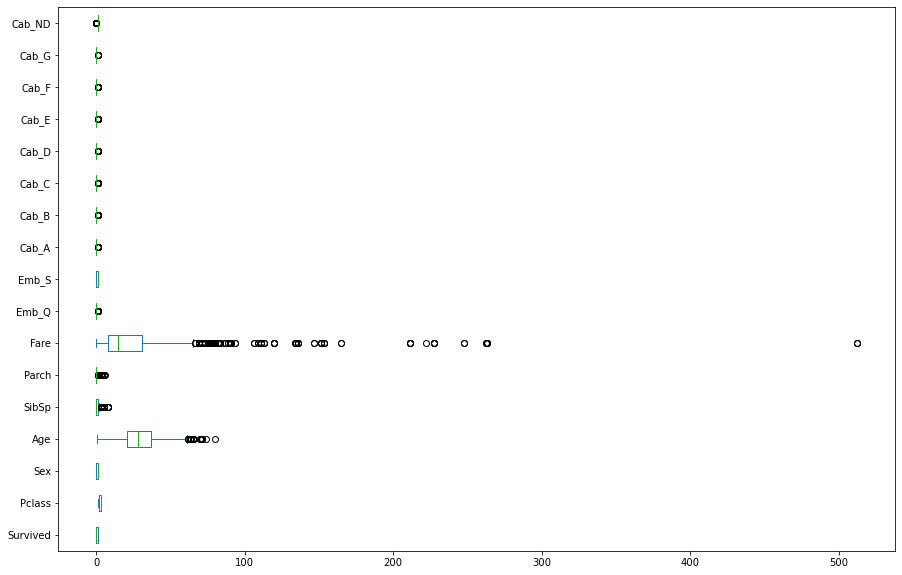

In [39]:
# построение boxplot для всех числовых столбцов
titanic.plot(kind='box', vert=False, figsize=(15,10))
plt.show()

In [40]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_Q,Emb_S,Cab_A,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_ND
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.597557,0.523008,0.381594,32.204208,0.086420,0.725028,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.772166
std,0.486592,0.836071,0.477990,13.790848,1.102743,0.806057,49.693429,0.281141,0.446751,0.128725,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.419670
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> * Видим, что выброс есть в стоимости билетов

> Используем статистические методы:правило трех сигм  и интерквартильный размах, посмотрим какие дадут меньше потерь

> * правила трех сигм

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 890
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  775 non-null    int64  
 1   Pclass    775 non-null    int64  
 2   Sex       775 non-null    int32  
 3   Age       775 non-null    float64
 4   SibSp     775 non-null    int64  
 5   Parch     775 non-null    int64  
 6   Fare      775 non-null    float64
 7   Emb_Q     775 non-null    uint8  
 8   Emb_S     775 non-null    uint8  
 9   Cab_A     775 non-null    uint8  
 10  Cab_B     775 non-null    uint8  
 11  Cab_C     775 non-null    uint8  
 12  Cab_D     775 non-null    uint8  
 13  Cab_E     775 non-null    uint8  
 14  Cab_F     775 non-null    uint8  
 15  Cab_G     775 non-null    uint8  
 16  Cab_ND    775 non-null    uint8  
dtypes: float64(2), int32(1), int64(4), uint8(10)
memory usage: 53.0 KB
None


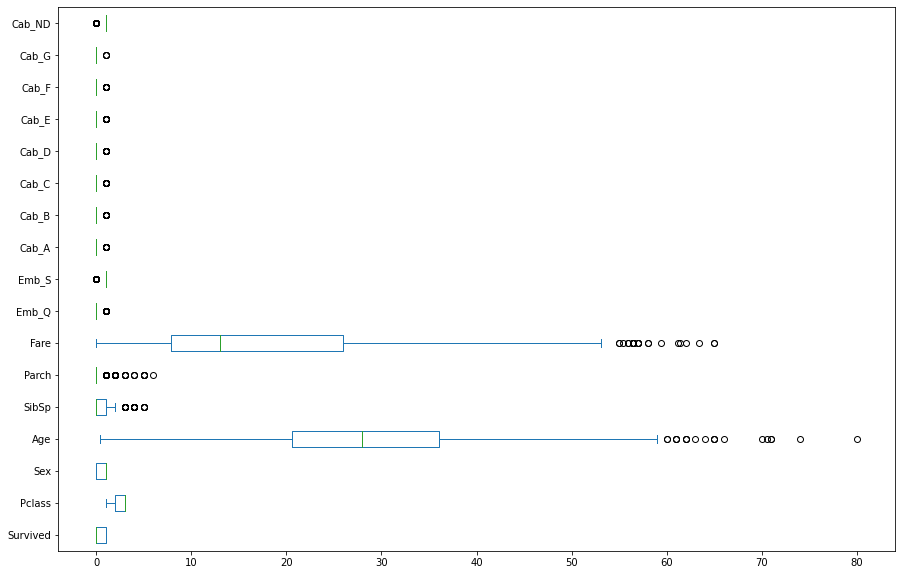

In [41]:
q1 = titanic['Fare'].quantile(0.25)
q3 = titanic['Fare'].quantile(0.75)

iqr = q3 - q1

df = titanic[(titanic['Fare'] >= q1 - 1.5 * iqr) & (titanic['Fare'] <= q3 + 1.5 * iqr)]

print(df.info())

df.plot(kind='box', vert=False, figsize=(15,10))
plt.show()

> * интерквартильный размах

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 890
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  871 non-null    int64  
 1   Pclass    871 non-null    int64  
 2   Sex       871 non-null    int32  
 3   Age       871 non-null    float64
 4   SibSp     871 non-null    int64  
 5   Parch     871 non-null    int64  
 6   Fare      871 non-null    float64
 7   Emb_Q     871 non-null    uint8  
 8   Emb_S     871 non-null    uint8  
 9   Cab_A     871 non-null    uint8  
 10  Cab_B     871 non-null    uint8  
 11  Cab_C     871 non-null    uint8  
 12  Cab_D     871 non-null    uint8  
 13  Cab_E     871 non-null    uint8  
 14  Cab_F     871 non-null    uint8  
 15  Cab_G     871 non-null    uint8  
 16  Cab_ND    871 non-null    uint8  
dtypes: float64(2), int32(1), int64(4), uint8(10)
memory usage: 59.5 KB
None


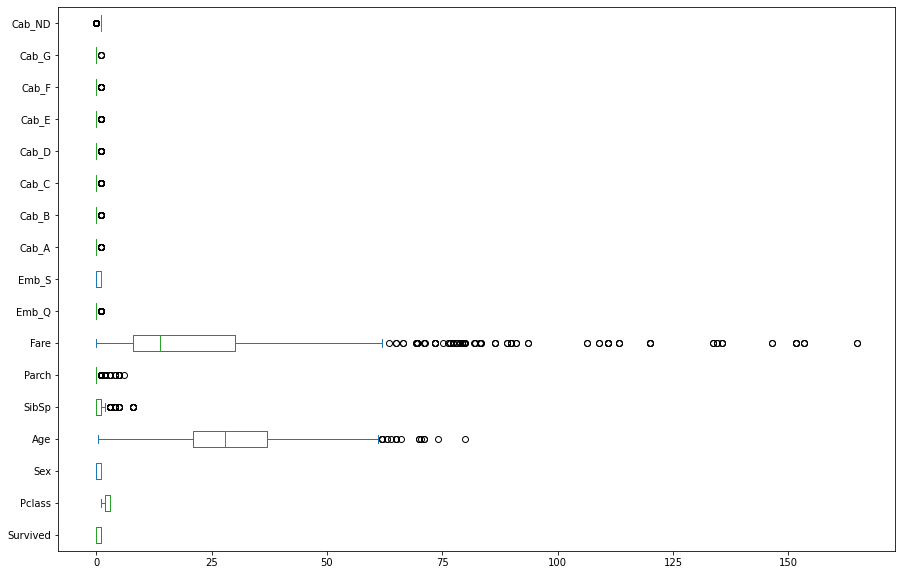

In [42]:
mean = titanic['Fare'].mean()
std = titanic['Fare'].std()

df1 = titanic[np.abs(titanic['Fare'] - mean) <= 3 * std]

print(df1.info())

df1.plot(kind='box', vert=False, figsize=(15,10))
plt.show()

> Я решил остановиться на последнем методе, что бы не потерять больше данных.
По моему мнению, больше ничего делать с данными не нужно.

In [43]:
titanic = df1.copy()

In [44]:
selectedColumns = list(filter(lambda i: i != 'Survived', titanic.columns))
X1 = titanic[selectedColumns]
X1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_Q,Emb_S,Cab_A,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_ND
0,3,1,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,0,1
1,1,0,38.0,1,0,71.2833,0,0,0,0,1,0,0,0,0,0
2,3,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,0,1,0,0,1,0,0,0,0,0
4,3,1,35.0,0,0,8.0500,0,1,0,0,0,0,0,0,0,1


In [45]:
y1 = titanic['Survived']
y1.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [46]:
# Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [47]:
model_2 = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=3000)
)

In [48]:
model_2.fit(X1_train, y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=3000))])

In [49]:
model_2.score(X1_test, y1_test)

0.7900763358778626

In [50]:
model_1.score(X_test, y_test)

0.6727272727272727

> Попробуем использовать нормализацию данных для столбцов и еще раз протестируем модель

In [51]:
df3 = titanic.copy()

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df3['Age'] = scaler.fit_transform(df3[['Age']])
df3['Fare'] = scaler.fit_transform(df3[['Fare']])

In [53]:
selectedColumns3 = list(filter(lambda i: i != 'Survived', df3.columns))
X3 = df3[selectedColumns]
X3.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_Q,Emb_S,Cab_A,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_ND
0,3,1,0.271174,1,0,0.043975,0,1,0,0,0,0,0,0,0,1
1,1,0,0.472229,1,0,0.432369,0,0,0,0,1,0,0,0,0,0
2,3,0,0.321438,0,0,0.048069,0,1,0,0,0,0,0,0,0,1
3,1,0,0.434531,1,0,0.322078,0,1,0,0,1,0,0,0,0,0
4,3,1,0.434531,0,0,0.048827,0,1,0,0,0,0,0,0,0,1


In [54]:
y3 = df3['Survived']
y3.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [55]:
# Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

In [56]:
model_3 = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=3000)
)

In [57]:
model_3.fit(X3_train, y3_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=3000))])

In [58]:
model_3.score(X3_test, y3_test)

0.7900763358778626

In [59]:
model_2.score(X1_test, y1_test)

0.7900763358778626

In [60]:
model_1.score(X_test, y_test)

0.6727272727272727

> Гистограмма возраста пассажиров

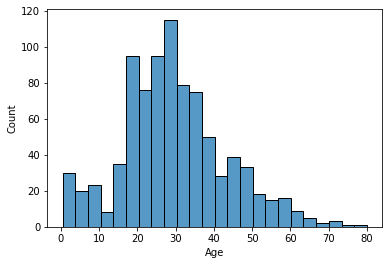

In [61]:
sns.histplot(data=titanic, x="Age")
plt.show()

* Этот график позволяет увидеть распределение возраста пассажиров на корабле. Он показывает, что большинство пассажиров были в возрасте от 20 до 40 лет.

In [62]:
# Создание нового столбца с информацией о выживаемости в зависимости от пола
titanic['Survived by Gender'] = titanic.apply(lambda row: 'Survived' if row['Survived'] == 1 else 'Died', axis=1)

# Создание нового столбца с информацией о выживаемости в зависимости от класса
titanic['Survived by Class'] = titanic.apply(lambda row: 'Survived' if row['Survived'] == 1 else 'Died', axis=1)


In [63]:
# Группировка данных по полу и выживаемости
gender_survival = titanic.groupby(['Sex', 'Survived by Gender']).size().unstack()

# Группировка данных по классу и выживаемости
class_survival = titanic.groupby(['Pclass', 'Survived by Class']).size().unstack()



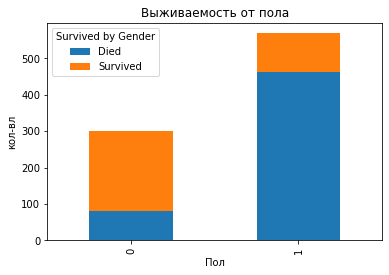

In [64]:
# Построение столбчатой диаграммы для данных о выживаемости в зависимости от пола
gender_survival.plot(kind='bar', stacked=True)
plt.title('Выживаемость от пола')
plt.xlabel('Пол')
plt.ylabel('кол-вл')
plt.show()

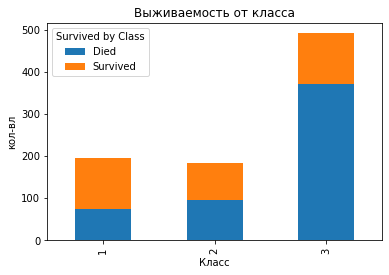

In [65]:
# Построение столбчатой диаграммы для данных о выживаемости в зависимости от класса
class_survival.plot(kind='bar', stacked=True)
plt.title('Выживаемость от класса')
plt.xlabel('Класс')
plt.ylabel('кол-вл')
plt.show()

<b> Выводы: <b><br>
1. Сравнивая данные изначально и полученный в ходе модификации и заполенения пропусков, классификации видим, что не смотря на ограниченное кол-во данных модель номер 2 (после модификации) показывает лучшие результаты точности на 12%. 
2. Все данные подвергались различными преобразованиями, с пояснениями после каждого из них.
3. По графикам можно сделать вывод, что выживаемость была выше всех у женщин и пассажиров первого класса.
4. Если бы данных было больше, то точность модели могла бы быть увеличена, так как преобразования делались на основании текущих данных, где было много пропусков, которые приходилось заполнять с оговоркой на то, что данные не в достаточном кол-ве, особенно когда пропуски заполнялись на основании обучения данных. Но и в целом все преобразования очень сильно зависят от полноты и кол-во пропущенных данных, собсвенно это мы видим из сравнения моделей.